In [412]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parent))

In [413]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [414]:
table_regression = pd.read_csv('../data/Oil_Pipeline_Accidents.csv', parse_dates=['Accident Date/Time', 'Shutdown Date/Time', 'Restart Date/Time'])
table_classification = pd.read_csv('../data/Heating_Oil_Consumption_And_Cost.csv', parse_dates=[])

In [ ]:
table_regression.drop(columns=['Pipeline Type', 'Accident City', 'Accident County', 'Accident State', 'Pipeline Shutdown'], axis=1).to_csv('../data/1.csv')

In [415]:
table_regression.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [416]:
table_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Report Number                         2795 non-null   int64         
 1   Supplemental Number                   2795 non-null   int64         
 2   Accident Year                         2795 non-null   int64         
 3   Accident Date/Time                    2795 non-null   datetime64[ns]
 4   Operator ID                           2795 non-null   int64         
 5   Operator Name                         2795 non-null   object        
 6   Pipeline/Facility Name                2674 non-null   object        
 7   Pipeline Location                     2795 non-null   object        
 8   Pipeline Type                         2777 non-null   object        
 9   Liquid Type                           2795 non-null   object        
 10  

In [417]:
table_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14628 entries, 0 to 14627
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               14628 non-null  int64  
 1   Development Name    14628 non-null  object 
 2   Borough             14628 non-null  object 
 3   Account Name        14628 non-null  object 
 4   Location            962 non-null    object 
 5   Meter AMR           14073 non-null  object 
 6   Meter Scope         22 non-null     object 
 7   TDS #               14628 non-null  int64  
 8   EDP                 14628 non-null  int64  
 9   RC Code             14628 non-null  object 
 10  Funding Source      13106 non-null  object 
 11  AMP #               12490 non-null  object 
 12  Vendor Name         14628 non-null  object 
 13  UMIS BILL ID        14628 non-null  int64  
 14  Revenue Month       14628 non-null  object 
 15  Service Start Date  14628 non-null  object 
 16  Serv

Визуализация данных

In [418]:
plt.style.use('seaborn-v0_8')

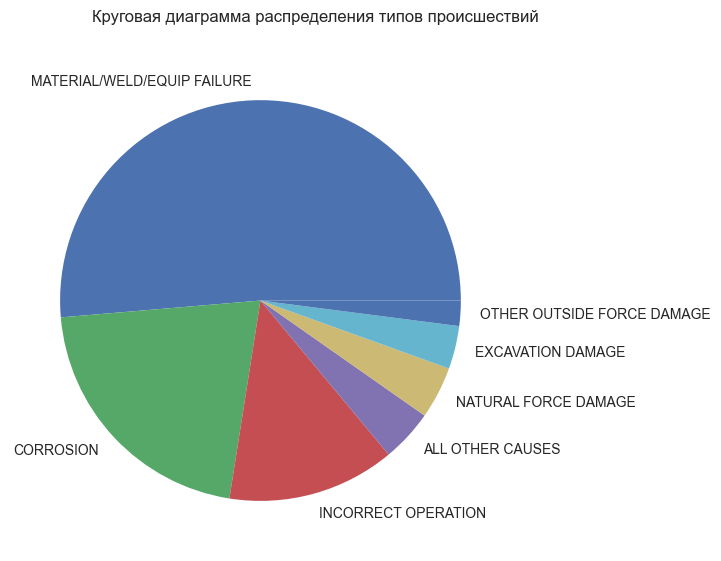

In [419]:
# Круговая диаграмма распределения типов происшествий

fig, axs = plt.subplots(constrained_layout=True)
fig.suptitle('Круговая диаграмма распределения типов происшествий\n')

info = table_regression.value_counts('Cause Category')

axs = plt.pie(info, labels=info.index)

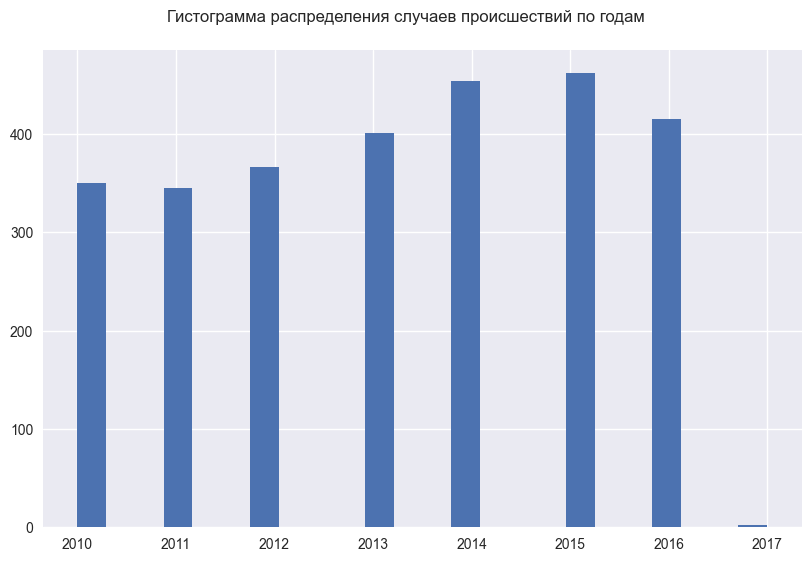

In [420]:
# Гистограмма распределения случаев происшествий по годам

fig, axs = plt.subplots(constrained_layout=True)
fig.suptitle('Гистограмма распределения случаев происшествий по годам\n')

axs = plt.hist(table_regression["Accident Year"], bins=24)

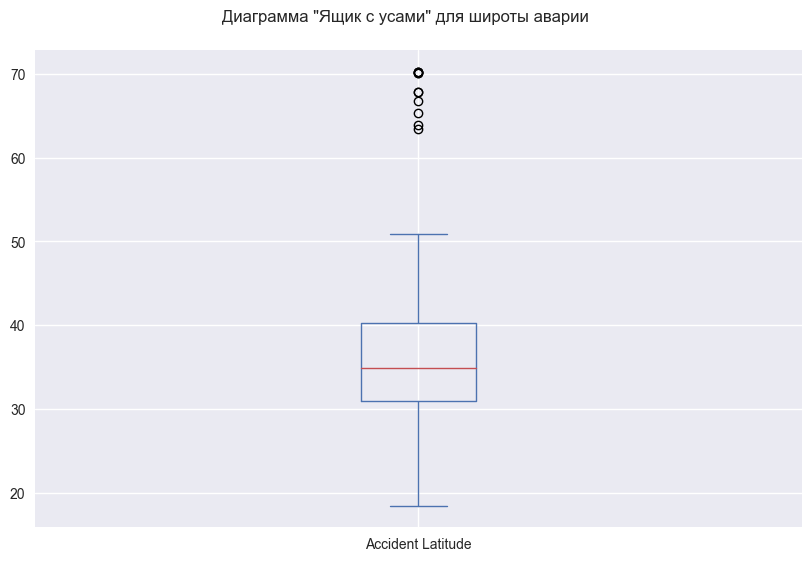

In [421]:
# Диаграмма "Ящик с усами" для широты аварии

fig, axs = plt.subplots(constrained_layout=True)
fig.suptitle('Диаграмма "Ящик с усами" для широты аварии\n')

axs = table_regression['Accident Latitude'].plot(kind="box", x=table_regression['Accident Latitude'])

C:\Users\bugae\AppData\Local\Temp\ipykernel_10668\3959970203.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  axs = sns.heatmap(table_regression.corr())


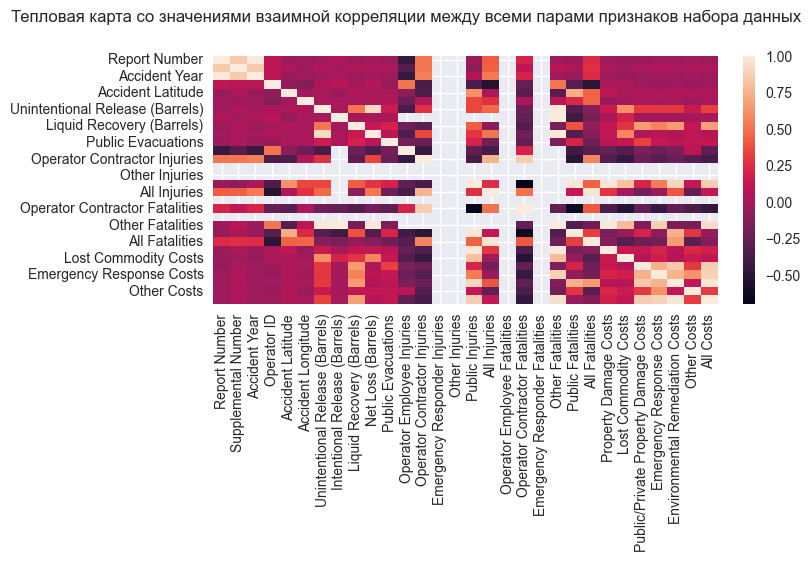

In [422]:
# Тепловая карта со значениями взаимной корреляции между всеми парами признаков набора данных

fig, axs = plt.subplots(constrained_layout=True)
fig.suptitle('Тепловая карта со значениями взаимной корреляции между всеми парами признаков набора данных\n')

axs = sns.heatmap(table_regression.corr())

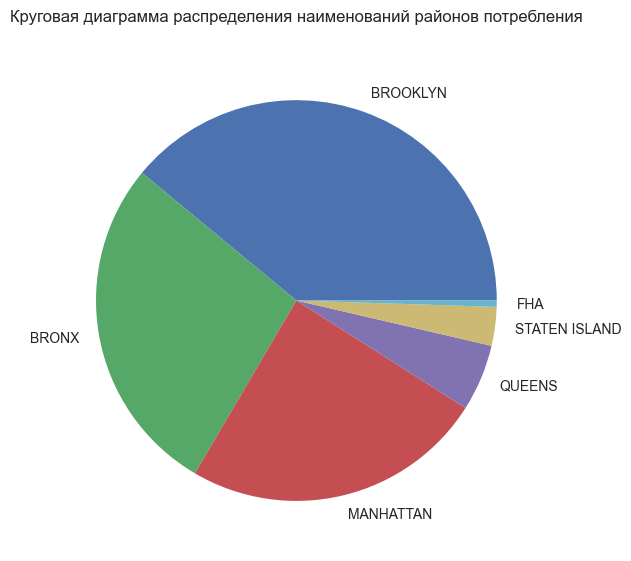

In [423]:
# Круговая диаграмма распределения наименований районов потребления

fig, axs = plt.subplots(constrained_layout=True)
fig.suptitle('Круговая диаграмма распределения наименований районов потребления\n')

info = table_classification.value_counts('Borough')

axs = plt.pie(info, labels=info.index)

Предобработка данных таблицы для регрессии

In [424]:
# 1. Выполним анализ столбиков таблицы для регрессии.
# 1.1 Посмотрим список всех столбцов таблицы. Удалим из таблицы поля, содержащие уникальные значения (похожие на id) и малоинформативные

table_regression.drop(columns=['Report Number', 'Supplemental Number', 'Operator ID', 
                               'Operator Name', 'Pipeline/Facility Name'], axis=1, inplace=True)

In [425]:
# 1.2 Отыщем неинформативные поля (такие поля, в которых практически нет значений -- при избавлении от nan'ов они могут сместить баланс весов)

table_regression.isnull().sum()


Accident Year                              0
Accident Date/Time                         0
Pipeline Location                          0
Pipeline Type                             18
Liquid Type                                0
Liquid Subtype                          1446
Liquid Name                             2573
Accident City                            315
Accident County                           75
Accident State                            12
Accident Latitude                          0
Accident Longitude                         0
Cause Category                             0
Cause Subcategory                          0
Unintentional Release (Barrels)            0
Intentional Release (Barrels)           1586
Liquid Recovery (Barrels)                  0
Net Loss (Barrels)                         0
Liquid Ignition                            0
Liquid Explosion                           0
Pipeline Shutdown                        212
Shutdown Date/Time                      1405
Restart Da

In [426]:
# 1.3 Удалим эти поля (всего 2795 записей в таблице)

table_regression.drop(columns=['Operator Employee Injuries', 'Liquid Name', 'Intentional Release (Barrels)', 
                               'Liquid Subtype', 'Shutdown Date/Time', 'All Fatalities', 'Restart Date/Time',
                               'Operator Employee Fatalities', 'Operator Contractor Fatalities', 'Emergency Responder Fatalities', 
                               'Other Fatalities', 'Public Fatalities', 'Operator Contractor Injuries',
                               'Emergency Responder Injuries', 'Other Injuries', 'Public Injuries', 'All Injuries'], axis=1, inplace=True)

In [427]:
table_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Accident Year                         2795 non-null   int64         
 1   Accident Date/Time                    2795 non-null   datetime64[ns]
 2   Pipeline Location                     2795 non-null   object        
 3   Pipeline Type                         2777 non-null   object        
 4   Liquid Type                           2795 non-null   object        
 5   Accident City                         2480 non-null   object        
 6   Accident County                       2720 non-null   object        
 7   Accident State                        2783 non-null   object        
 8   Accident Latitude                     2795 non-null   float64       
 9   Accident Longitude                    2795 non-null   float64       
 10  

In [428]:
# 1.4 Разделим поля с датой на месяц и год (поскольку есть поле год, достаточно только месяца)

table_regression['month'] = pd.DatetimeIndex(table_regression['Accident Date/Time']).month
table_regression['day'] = pd.DatetimeIndex(table_regression['Accident Date/Time']).day
table_regression.drop(columns=['Accident Date/Time'], axis=1, inplace=True)

In [429]:
table_regression.to_csv('../data/regression.csv')

In [430]:
# 1.5 Заполним пропуски

def fill_empty_cell(column_name, df):
    if df.dtypes[column_name] == "float64":
        df[column_name] = df[column_name].fillna(df[column_name].mean())
        # df[column_name] = df[column_name].replace('nan', df[column_name].mean())
    elif df.dtypes[column_name] == "int64":
        df[column_name] = df[column_name].fillna(df[column_name].median())
        # df[column_name] = df[column_name].replace('nan', df[column_name].median())
    else:
        df[column_name] = df[column_name].fillna(value=df[column_name].mode())
        # df[column_name] = df[column_name].replace('nan', df[column_name].mode())


null_columns = []
for i in table_regression.columns:
    if len(table_regression[table_regression[i].isnull()]) > 0:
        null_columns.append(i)
print(null_columns)


for name in null_columns:
    fill_empty_cell(name, table_regression)

['Pipeline Type', 'Accident City', 'Accident County', 'Accident State', 'Pipeline Shutdown', 'Public Evacuations', 'Property Damage Costs', 'Lost Commodity Costs', 'Public/Private Property Damage Costs', 'Emergency Response Costs', 'Environmental Remediation Costs', 'Other Costs']


In [437]:
second_wave = []
for i in table_regression.columns:
    if len(table_regression[table_regression[i].isnull()]) > 0:
        second_wave.append(i)
        print(f"В столбце {i} есть пустые элементы")
print(second_wave)

В столбце Pipeline Type есть пустые элементы
В столбце Accident City есть пустые элементы
В столбце Accident County есть пустые элементы
В столбце Accident State есть пустые элементы
В столбце Pipeline Shutdown есть пустые элементы
['Pipeline Type', 'Accident City', 'Accident County', 'Accident State', 'Pipeline Shutdown']


In [432]:
# 1.6 Дополнительная волна удаления (поскольку в датасете присутствует проблема с типизацией, проведем 2 волну удаления)

table_regression.dropna()

,Accident Year,Pipeline Location,Pipeline Type,Liquid Type,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,...,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,month,day
0,2010,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",MCPHERSON,MCPHERSON,KS,38.670700,-97.781230,INCORRECT OPERATION,...,0.964072,110.0,1517.0,0.0,0.0,0.0,0.0,1627,1,1
4,2010,ONSHORE,UNDERGROUND,CRUDE OIL,SHERMAN,GRAYSON,TX,33.582660,-96.648810,EXCAVATION DAMAGE,...,0.964072,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,1,7
5,2010,ONSHORE,UNDERGROUND,CRUDE OIL,NECHE,PEMBINA,ND,48.995550,-97.525540,MATERIAL/WELD/EQUIP FAILURE,...,0.000000,76940.0,167775.0,150000.0,1800000.0,2000000.0,0.0,4194715,1,8
6,2010,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",GALENA PARK,HARRIS,TX,29.430500,-95.120100,MATERIAL/WELD/EQUIP FAILURE,...,0.964072,0.0,400.0,0.0,0.0,70000.0,0.0,70400,1,9
9,2010,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",PASADENA,HARRIS,TX,29.714780,-95.176110,ALL OTHER CAUSES,...,0.964072,0.0,50.0,0.0,10000.0,10000.0,10000.0,30050,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,2016,ONSHORE,ABOVEGROUND,CRUDE OIL,HOUSTON,HARRIS,TX,29.614125,-95.184793,ALL OTHER CAUSES,...,0.000000,65000.0,75.0,0.0,0.0,0.0,0.0,65075,12,23
2790,2016,ONSHORE,ABOVEGROUND,CRUDE OIL,TINA,CARROLL,MO,39.517036,-93.486055,MATERIAL/WELD/EQUIP FAILURE,...,0.000000,0.0,15.0,0.0,0.0,61000.0,0.0,61015,12,27
2792,2016,ONSHORE,TANK,CRUDE OIL,CUSHING,PAYNE,OK,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILURE,...,0.000000,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050,12,29
2793,2017,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",INDUSTRY,BEAVER COUNTY,PA,40.631074,-80.440463,ALL OTHER CAUSES,...,0.000000,11852.0,11.0,0.0,29565.0,0.0,0.0,41428,1,3


In [438]:
table_regression.isnull().sum()

Accident Year                             0
Pipeline Location                         0
Pipeline Type                            18
Liquid Type                               0
Accident City                           315
Accident County                          75
Accident State                           12
Accident Latitude                         0
Accident Longitude                        0
Cause Category                            0
Cause Subcategory                         0
Unintentional Release (Barrels)           0
Liquid Recovery (Barrels)                 0
Net Loss (Barrels)                        0
Liquid Ignition                           0
Liquid Explosion                          0
Pipeline Shutdown                       212
Public Evacuations                        0
Property Damage Costs                     0
Lost Commodity Costs                      0
Public/Private Property Damage Costs      0
Emergency Response Costs                  0
Environmental Remediation Costs 